<a href="https://colab.research.google.com/github/wenjiang-liu/jigsaw-detect-toxicity-conversations/blob/master/Bert_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformer简介

*   《Attention Is All Your Need》是一篇Google提出全面使用self-Attention的论文。这篇论文中提出一个全新的模型，叫 Transformer，抛弃了以往深度学习任务里面使用到的 CNN 和 RNN。目前大热的Bert就是基于Transformer构建的，这个模型广泛应用于NLP领域，例如机器翻译，问答系统，文本摘要和语音识别等等方向。

*   众所周知RNN虽然模型设计小巧精妙，但是其线性序列模型决定了无法实现并行，从两个任意输入和输出位置获取依赖关系都需要大量的运算，运算量严重受到距离的制约；而且距离不但影响性能也影响效果，随着记忆时序的拉长，记忆削弱，导致学习能力削弱。

*   为了抛弃RNN step by step线性时序，Transformer使用了可以biself-attention，不依靠顺序和距离就能获得两个位置（实质是key和value）的依赖关系（hidden）。这种计算成本减少到一个固定的运算量，虽然注意力加权会减少有效的resolution表征力，但是使用多头multi-head attention可以弥补平均注意力加权带来的损失。
*   自注意力是一种关注自身序列不同位置的注意力机制，能计算序列的表征representation。


*   和之前分享的Seq2Seq+SoftAttention相比，Transformer不仅关注encoder和decoder之间的attention，也关注encoder和decoder各自内部自己的attention。也就是说前者的hidden是靠lstm来实现，而transformer的encoder或者decoder的hidden是靠self-attention来实现。

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
from google.colab import drive
drive.mount('/content/drive')
!cp drive/My Drive/Colab Notebooks/Untitled.ipynb ./
!jupyter nbconvert --to PDF "Untitled.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

# Transformer结构

Transformer整体结构
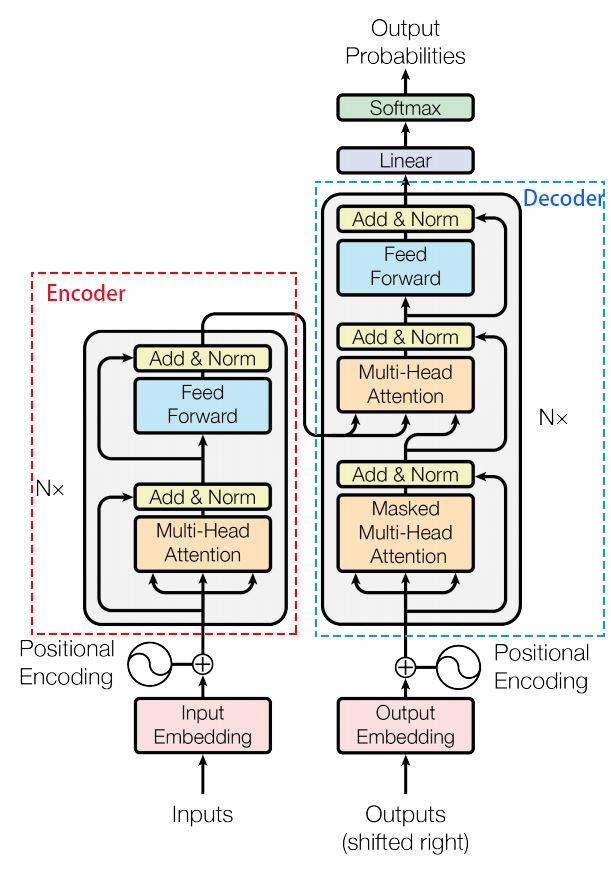

Transformer是由encoder和decoder两个部分组成的
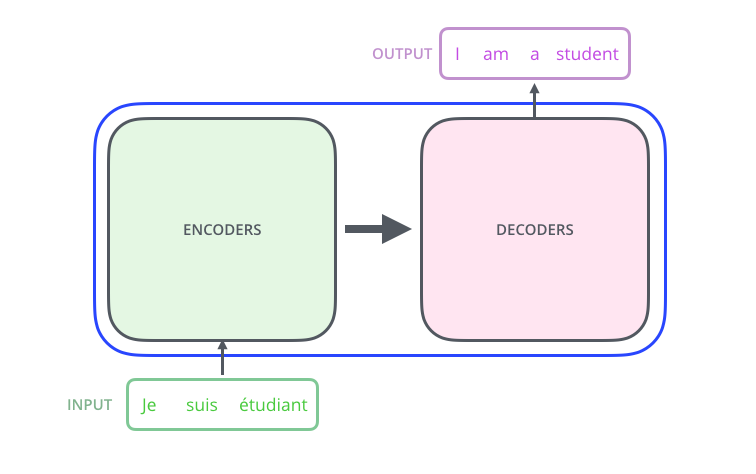

在transformer中，Encoder由6个EncoderLayer构成，Decoder由6个DecoderLayer构成：
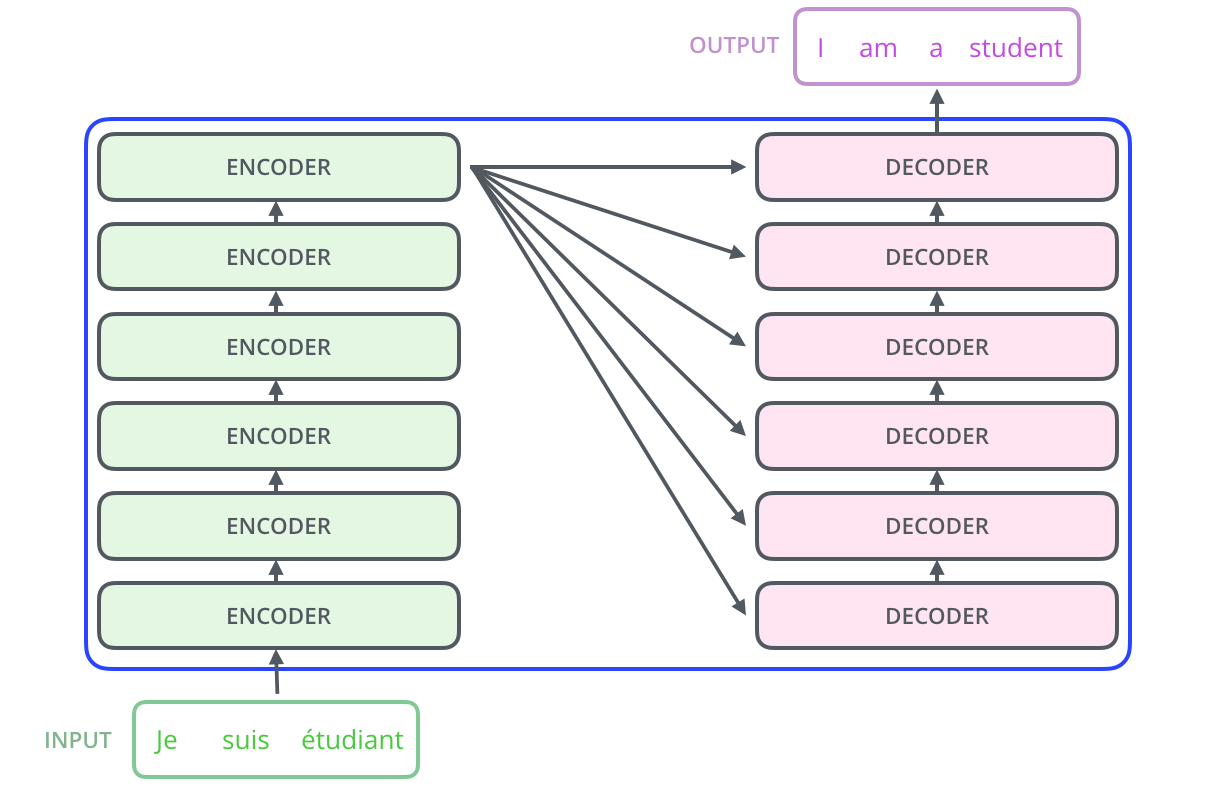

每一个encoder的内部结构

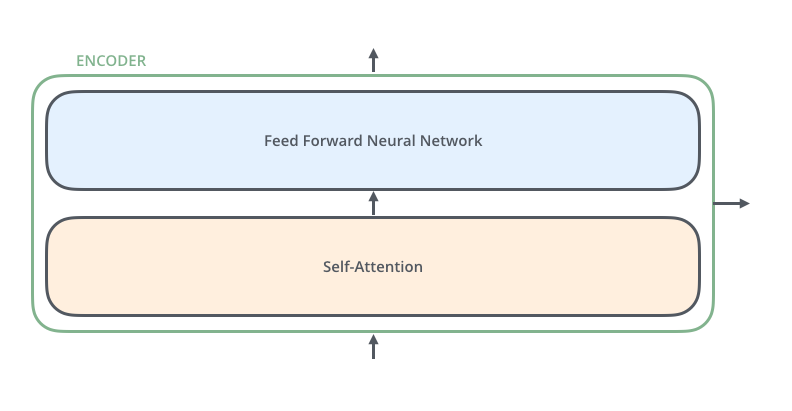

词向量表示：transformer原文使用的词向量维度是512，这里用4个方格代表512维的向量


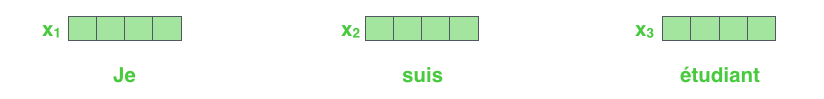

词向量传入transformer模型

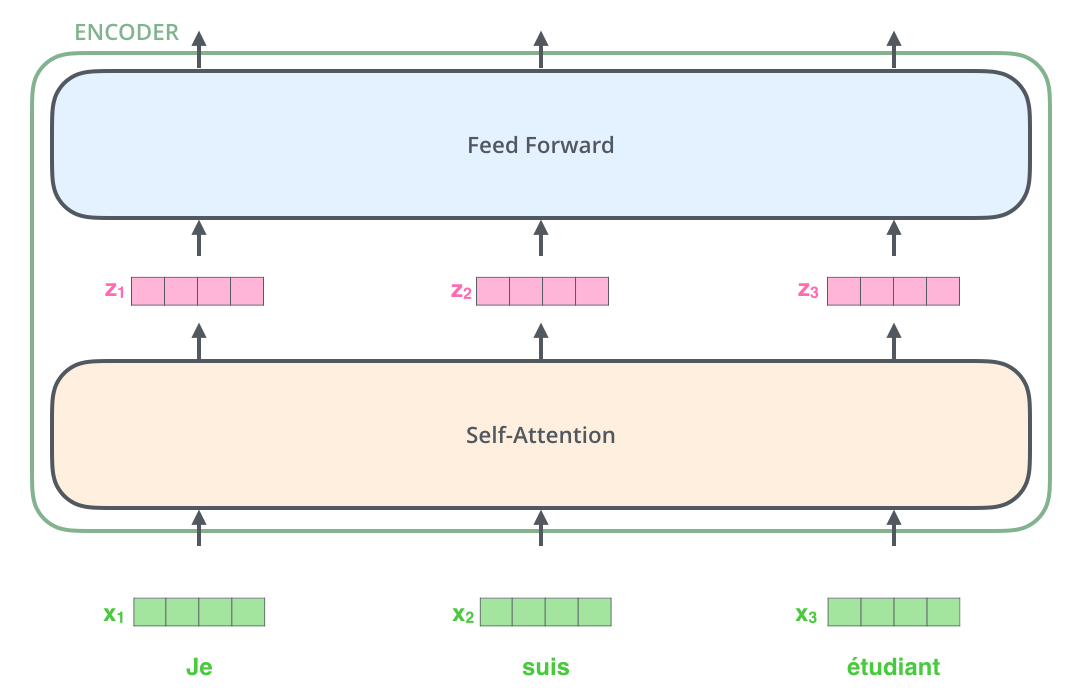

# self-attention的原理



## Attention 计算

### 1 产生K,Q,V三个向量
通过学习，构建W_Query，W_Key，W_Value三个权重矩阵，用输入的embedding乘以权重矩阵，分别得到query，key和value向量，记为K，Q，V，K,Q,V均为64维向量



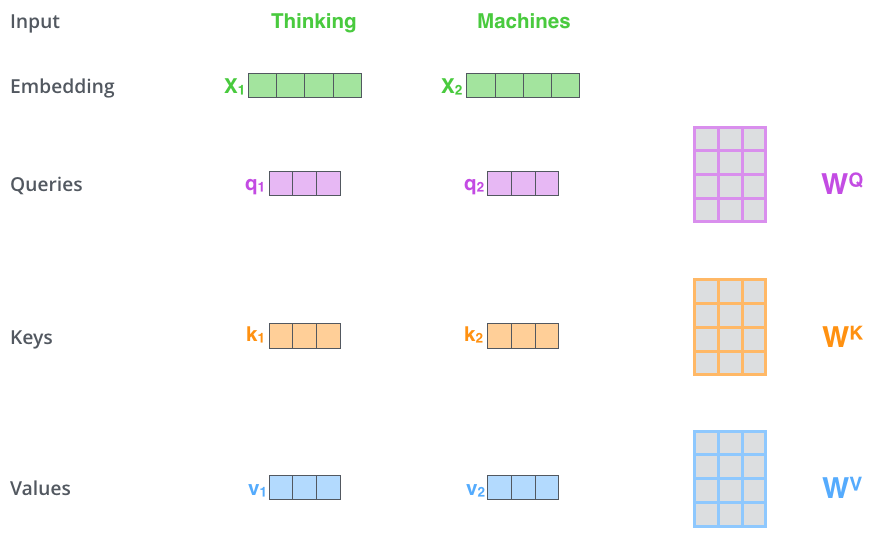




### 2计算q与k的相似度

对于每一个q和k，计算q与k的点积，得到q与k的相似度

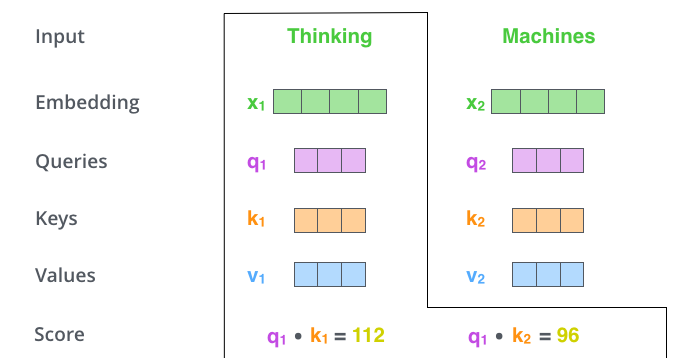

### 3计算权重分布

将q与k的点积除以K,Q,V维度的开方，保证结果在梯度敏感区，经过softmax归一化

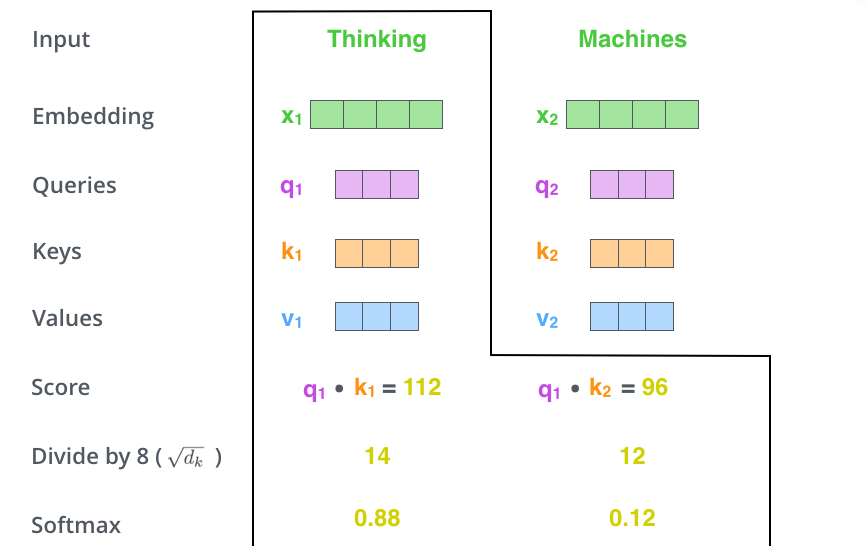

### 4 输出新向量

transformer每一层的输出可以看作当前的token被表示为其他所有token的加权求和

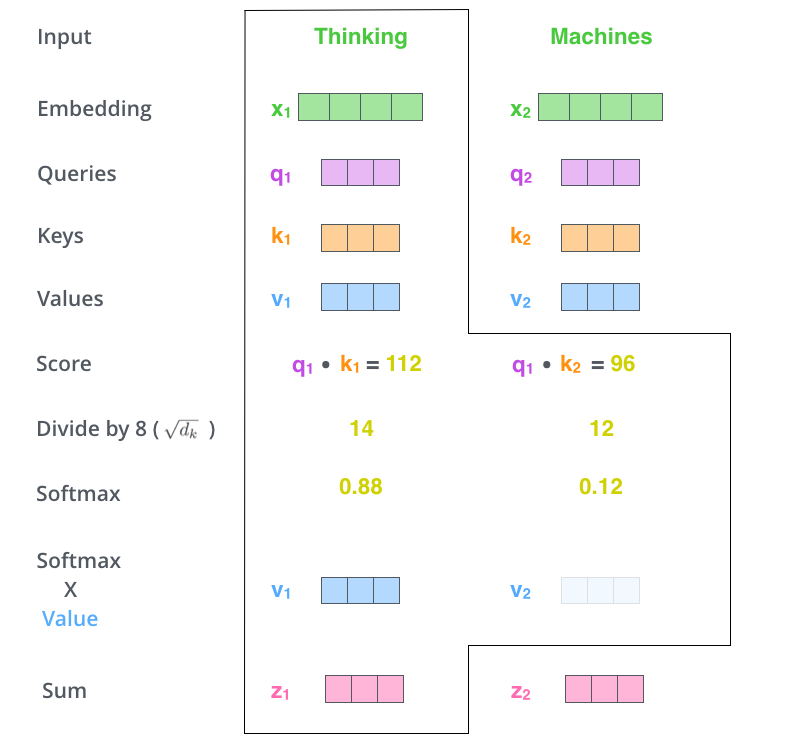

## Self-Attention的优势

1.   从上面的attention计算方式可以看出，由于Z1与Z2的计算并不依赖其前后顺序，所以可以对Z1和Z2进行同时计算，这是Transfomer结构的优势之一
2.   Transformer是通过矩阵计算的方式得到attention分布的，所以相比传统的RNN结构，它的另一个优势是，某两个token距离的远近并不会影响它们的相关性计算


同时计算Z1和Z2，也就是相当于把原来的K,Q,V的向量计算转换为矩阵计算






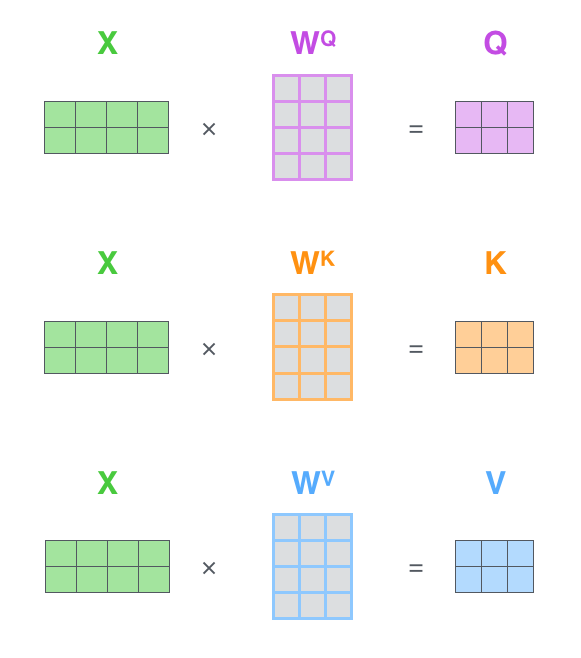


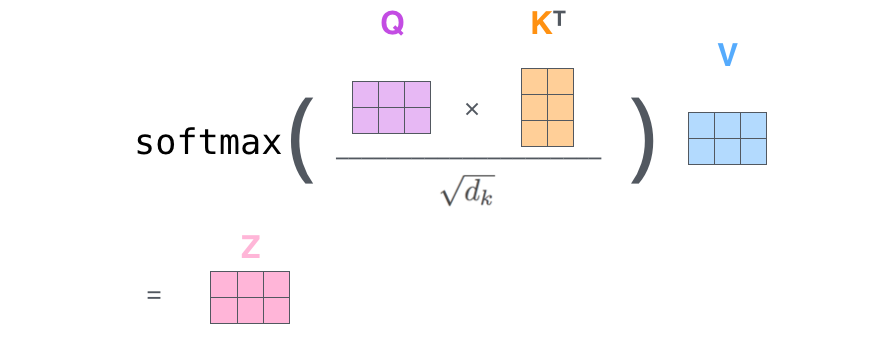


## **多头机制**



原文中对上面的计算做了多次操作，称作多头（multi-head)机制，Transformer重复计算attention 8次，类似于CNN中的filter，每个head可以学到不同的内容，最终将多个head组合到一起，在映射回原来的维度，保持输出维度不变

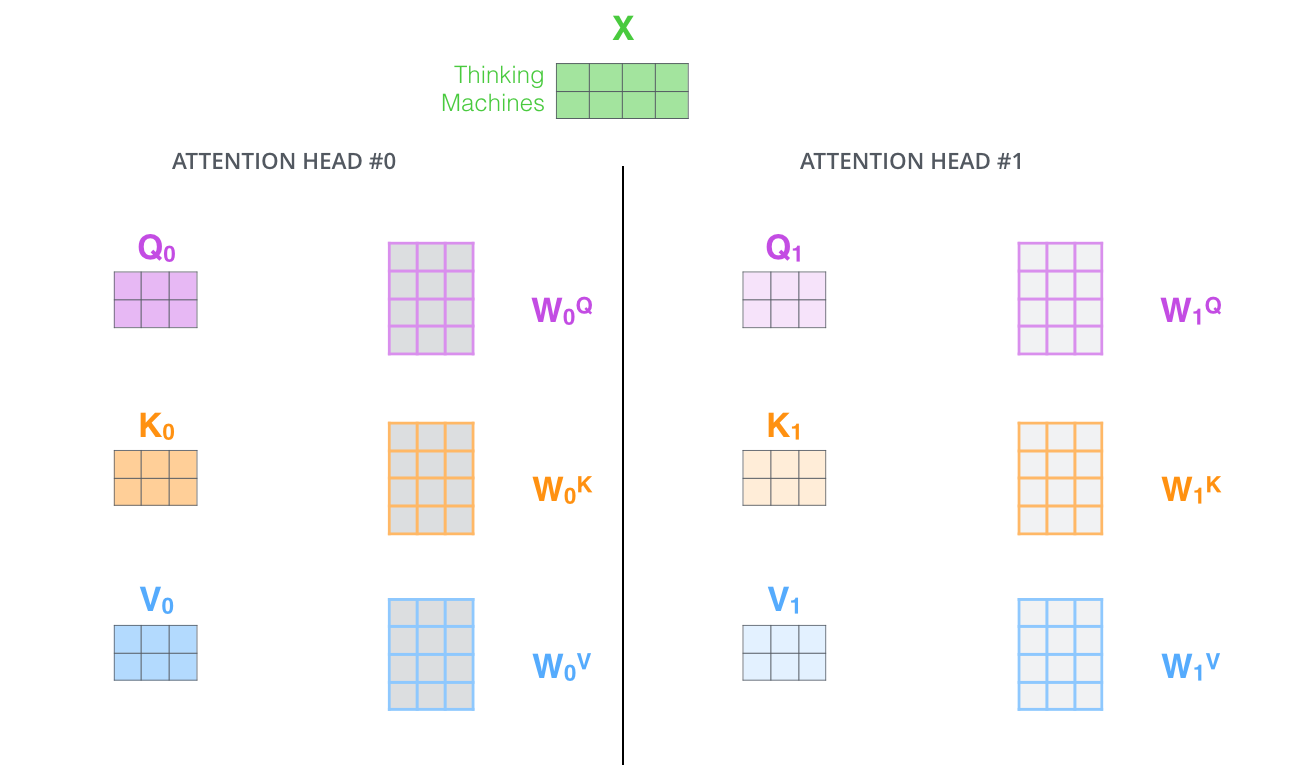

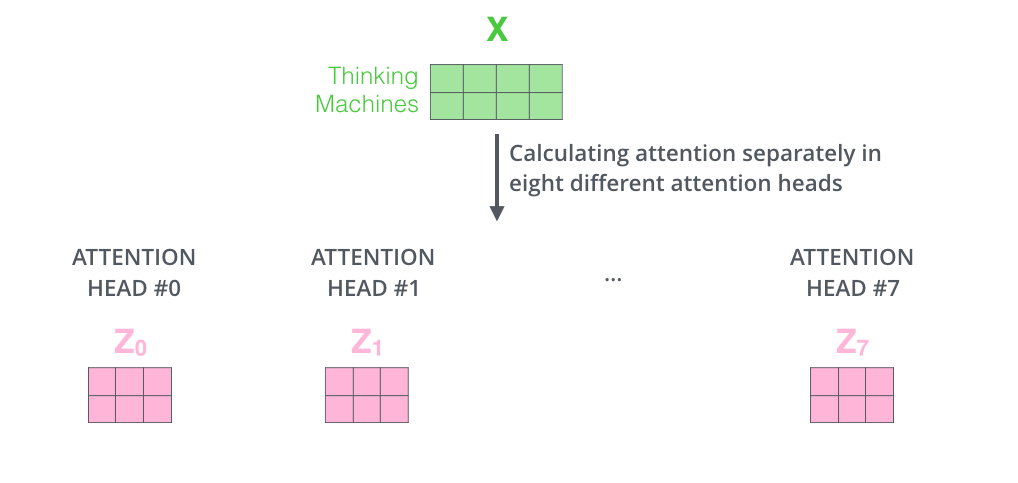

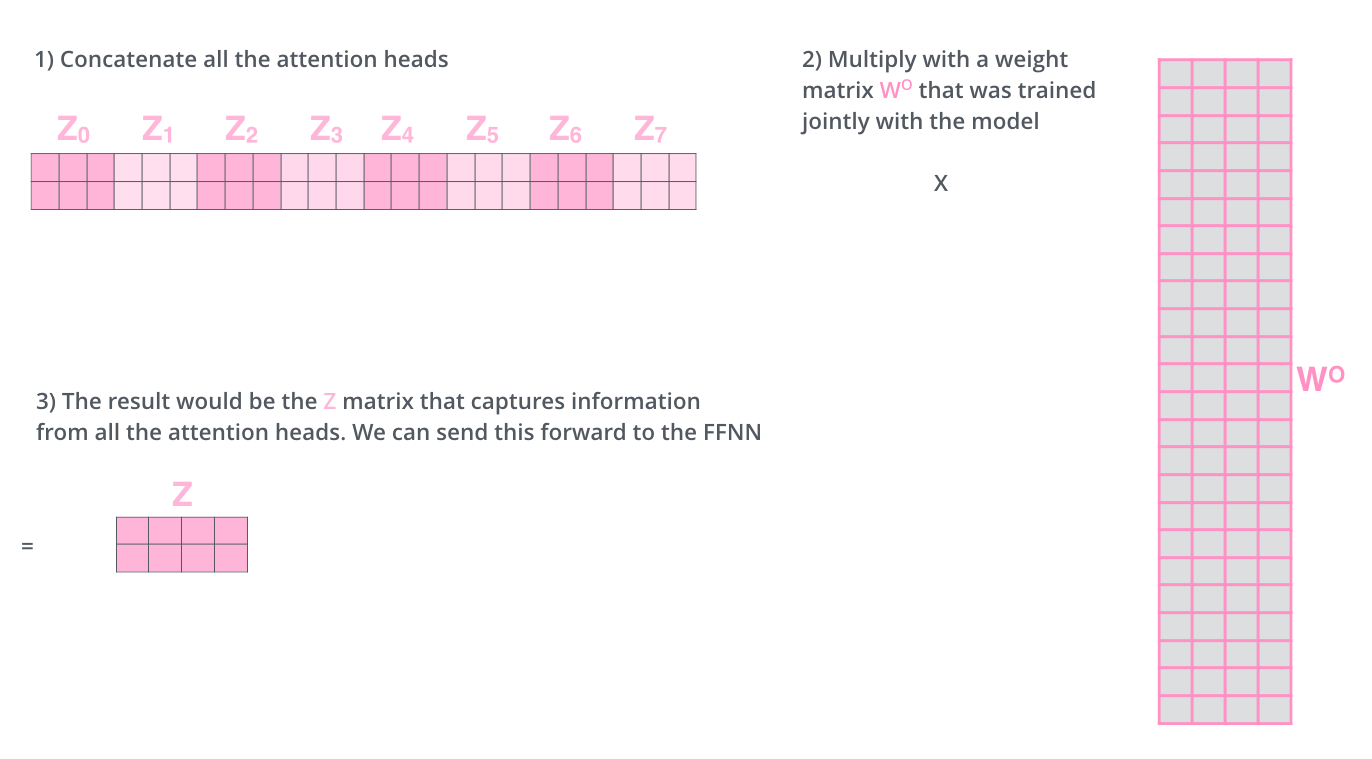

## Embeddings

### Token Embeddings

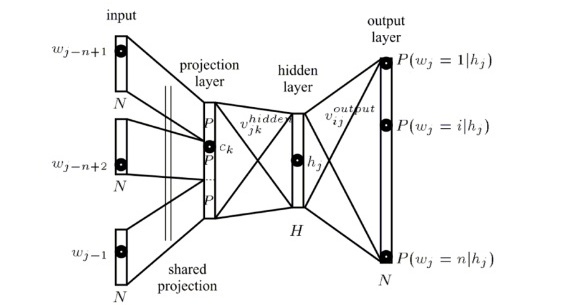

### positional embeddings

Transformer中使用到的positional embedding公式

其中，pos 即 position，意为 token 在句中的位置，设句子长度为 L ，则pos = 0，1，...L-1;i为向量中的某一维度

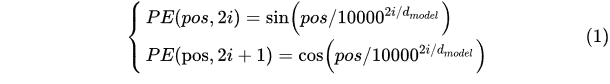



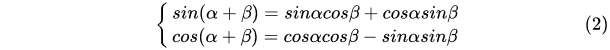

# Bert



*   Bert是在transformer基础上进行大量的非监督学习得到的预训练语言模型
*   谷歌最初提出了Bert-base和Bert-large两种模型
      
    BERTBASE模型，一个12层，768维，12个自注意头

    BERTLARGE模型，一个24层，1024维，16个自注意头


*   Bert只用到了Transformer中的Encoder部分



## Bert预训练任务



1.   在预训练任务中，Bert随机mask 15%的token，用上下文来预测被mask的词语
2.   Next Sentence Prediction（NSP），Bert会从其他语料抽取某一个句子加入到当前文档中，用前后文预测被加入的句子是否为原始语料中的一部分



## Bert微调任务

Bert的原论文中展示了以下四个任务：


1.   单句分类
2.   句子对分类
1.   问答任务
1.   标注任务



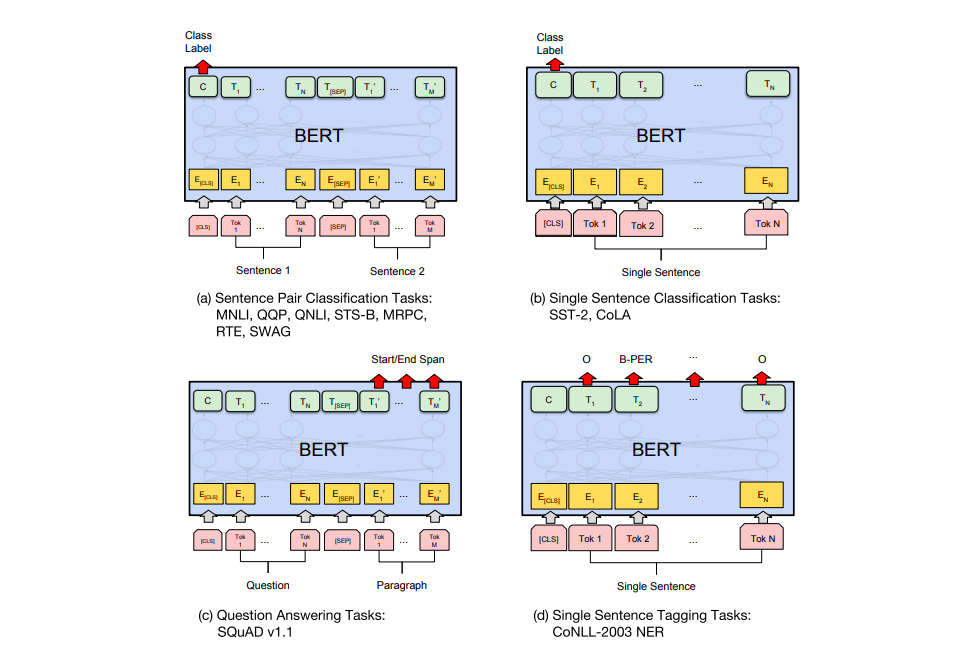







# Bert 实际应用

In [ ]:
!pip install bert4keras==0.8.4
!wget https://storage.googleapis.com/albert_zh/albert_small_zh_google.zip
!unzip albert_small_zh_google.zip -d ./albert_small_zh_google
# !wget https://storage.googleapis.com/albert_models/albert_large_zh.tar.gz
# !tar -xzf albert_large_zh.tar.gz

     |████████████████████████████████| 378kB 18.6MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
  Created wheel for bert4keras: filename=bert4keras-0.8.4-cp36-none-any.whl size=37856 sha256=683916c3a5cd84586288b4410d6ec6da4d57d5037abcea50d417916c1a6d0532
  Stored in directory: /root/.cache/pip/wheels/c9/de/bf/8711d68f5daaf79fb28ebae0807df2c0a317cd8bc6f159d3ac
Successfully built bert4keras
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
--2020-11-20 01:40:45--  https://storage.googleapis.com/albert_zh/albert_small_zh_google.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 172.217.9.208, 172.217.15.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53458815 (51M) [application/zip]
Saving to: ‘albert_small_zh_google.zip’

albert_small_zh_goo 100%[===================>]  

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
device_name=tf.test.gpu_device_name()
print(device_name)

TensorFlow 1.x selected.
1.15.2
/device:GPU:0


In [ ]:
__author__ = "Wenjiang Liu"
__email__ = "wenjiang@staff.weibo.com"
import sys
# sys.path.append("/".join(__file__.split('/')[0:-1]))
from bert4keras.backend import keras, K
from bert4keras.models import build_transformer_model
from bert4keras.tokenizers import Tokenizer
from bert4keras.optimizers import Adam
from bert4keras.layers import ConditionalRandomField
from keras.layers import Dense
from keras.models import Model
import os
import platform
from bert_crf_general_utils import data_generator, NamedEntityRecognizer, Evaluator, get_data_list,load_data
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
def build_config_dict(): #所有的参数在这里配置
    config_dict = {
        'maxlen': 512,
        'category_num': 1,
        'x_column': "video_text",
        'y_column': "主题词",
        'input_file': "灵犀所有资源全量处理数据.xlsx",
        'epochs': 10,
        'batch_size': 16,
        'bert_size': "small",

        'bert_layers': 6,
        'learing_rate': 1e-5,  # bert_layers越小，学习率应该要越大
        'crf_lr_multiplier': 1000,  # 必要时扩大CRF层的学习率
    }
    # config_dict['save_model'] = "phone_adam_{}.h5".format(config_dict['epochs'])
    config_dict['load_model'] = "/content/gdrive/My Drive/general_model_0928.weights"
    config_dict['output_model'] = "general_model_video.weights"
    system_version = platform.platform()
    if "Windows" in system_version:
        config_dict['model_path'] = r"D:\models\albert_small_zh_google"
    elif "Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic" in system_version:
        config_dict['model_path'] = r"/content/albert_small_zh_google"
    elif 'Linux-3.10.0-957.el7.centos.toa.x86_64-x86_64-with-centos-7.6.1810-Core' in system_version:  # 179
        models_path179 = "/data1/minisearch/wenjiang/melon/weibo/keyword/keyword_classifier/temp"
        config_dict['model_path'] = os.path.join(models_path179, "albert_small_zh_google")
        config_dict['save_model'] = os.path.join(models_path179, "best_model.weights")
    else:
        print("未匹配到适合的系统版本")
        exit(1)
    config_dict['config_path'] = os.path.join(config_dict['model_path'], "albert_config_small_google.json")
    config_dict['checkpoint_path'] = os.path.join(config_dict['model_path'], "albert_model.ckpt")
    config_dict['dict_path'] = os.path.join(config_dict['model_path'], "vocab.txt")

    labels = ['KEY']
    id2label = dict(enumerate(labels))
    label2id = {j: i for i, j in id2label.items()}
    num_labels = len(labels) * 2 + 1
    config_dict['label2id'] = label2id
    config_dict['num_labels'] = num_labels
    config_dict['labels'] = labels

    return config_dict


class KeywordAnalysisBertCRF():
    def __init__(self, config_dict, train_data=None, valid_data=None, test_data=None, load_weight=False):
        for key in config_dict:
            setattr(self, key, config_dict[key])

        self.tokenizer = Tokenizer(self.dict_path)
        # self.model = self.build_model()
        self.model, self.CRF = self.build_model()
        if load_weight:
            self.load_weight()

        self.NER = NamedEntityRecognizer(trans=K.eval(self.CRF.trans), starts=[0], ends=[0],model=self.model,tokenizer=self.tokenizer)

        if train_data:
            self.train_generator = data_generator(train_data, self.batch_size,self.tokenizer,self.maxlen,self.labels)
            # self.train_generator = data_generator(train_data, self.batch_size, self.tokenizer, self.maxlen, self.lables)
        if valid_data:
            self.valid_data=valid_data
            # self.valid_generator = data_generator(valid_data, self.batch_size, self.tokenizer, self.maxlen, self.lables)
        if test_data:
            self.test_data = test_data
            # self.test_generator = data_generator(test_data, self.batch_size, self.tokenizer, self.maxlen, self.lables)

    def build_model(self):
        model = build_transformer_model(
            self.config_path,
            self.checkpoint_path,
            model='albert',
        )
        output_layer = 'Transformer-FeedForward-Norm'
        output = model.get_layer(output_layer).get_output_at(self.bert_layers - 1)

        output = Dense(self.num_labels)(output)
        CRF = ConditionalRandomField(lr_multiplier=self.crf_lr_multiplier)
        output = CRF(output)

        model = Model(model.input, output)
        model.summary()

        model.compile(
            loss=CRF.sparse_loss,
            optimizer=Adam(self.learing_rate),
            metrics=[CRF.sparse_accuracy]
        )
        return model, CRF

    def load_weight(self):
        self.model.load_weights(self.load_model)

    def train(self):
        evaluator = Evaluator(CRF=self.CRF,NER=self.NER,model=self.model,evaluate_fun=self.evaluate,valid_data=self.valid_data,test_data=self.test_data)
        self.model.fit_generator(
            self.train_generator.forfit(),
            steps_per_epoch=len(self.train_generator),
            epochs=self.epochs,
            callbacks=[evaluator]
        )
        self.model.save(self.output_model)

    def evaluate(self, data, output_verbose=False):
        """评测函数
        """
        res_dict_list = []
        X, Y, Z = 1e-10, 1e-10, 1e-10
        for d_dict in tqdm(data): #[{'query': '摄影技巧', 'data': [['vlog004 ', 'O'], ['宠物摄影', 'KEY'], ['小技巧。', 'O']},]
            d = d_dict['data']
            query = d_dict['query']
            text = ''.join([i[0] for i in d])
            R = set(self.NER.recognize(text,query))
            T = set([tuple(i) for i in d if i[1] != 'O'])
            X += len(R & T)
            Y += len(R)
            Z += len(T)
            if output_verbose:
                res_dict = dict()
                res_dict['text'] = text
                res_dict["keywords"] = ';'.join([pairs[0] for pairs in T])
                res_dict["predicted_keywords"] = ";".join([pairs[0] for pairs in R])
                res_dict_list.append(res_dict)
        f1, precision, recall = 2 * X / (Y + Z), X / Y, X / Z
        if output_verbose:
            pd.DataFrame(res_dict_list).to_excel("postag_test统计_git_best.xlsx")
        return f1, precision, recall

    def predict_single_instance(self, text,query, ignore_tags=True):  # 预测单条数据
        """

        :param text: string 单个text
        :param ignore_tags: 如果为false，返回词语及对应标签，如 ["iphone11","KEY"]
        :return: 提取到的主题词list
        """
        res = self.NER.recognize(text,query)
        if ignore_tags:
            res = [pairs[0] for pairs in res]
        return res






In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

config_dict = build_config_dict()

input_file = config_dict['input_file']
x_column = config_dict['x_column']
y_column = config_dict['y_column']
query = "query"

data = get_data_list(input_file, x_column, y_column,query)  # [[text，keywords],[text，keywords]]

train_data, test_data = train_test_split(data, train_size=0.9, test_size=0.1, random_state=42)# shuffle=False)
train_data, valid_data = train_test_split(train_data, train_size=0.9, test_size=0.1, random_state=42)

train_data = load_data(train_data)
valid_data = load_data(valid_data)
test_data = load_data(test_data)

# bert_crf = KeywordAnalysisBertCRF(config_dict, train_data, valid_data, test_data, load_weight=True)
# predicted_keywords_list = bert_crf.train()
# bert_crf.model.save('/content/gdrive/My Drive/general_model_0928.weights')

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [ ]:
bert_crf = KeywordAnalysisBertCRF(config_dict, train_data, valid_data, test_data, load_weight=False)
predicted_keywords_list = bert_crf.train()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        (None, None)         0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      (None, None)         0                                            
__________________________________________________________________________________________________
Embedding-Token (Embedding)     (None, None, 128)    2704384     Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, None, 128)    256         Input-Segment[0][0]              
___________

  0%|          | 0/12761 [00:00<?, ?it/s]

[[ 1.3500583   0.844878   -8.33985   ]
 [-2.1275947  -0.49337158  3.3896735 ]
 [-1.5705955  -1.5494181   1.7489581 ]]


  0%|          | 16/14179 [00:00<01:33, 152.06it/s]

valid:  f1: 0.75993, precision: 0.79542, recall: 0.72747, best f1: 0.75993



100%|██████████| 14179/14179 [01:30<00:00, 157.04it/s]


test:  f1: 0.55398, precision: 0.63732, recall: 0.48991

Epoch 2/10
7178/7178 [==============================] - 1241s 173ms/step - loss: 1.3900 - sparse_accuracy: 0.7997


  0%|          | 18/12761 [00:00<01:13, 174.29it/s]

[[  1.4519397   0.7640448 -12.33357  ]
 [ -2.3667693  -2.2021027   3.2428856]
 [ -1.6505365  -1.9095497   1.8411015]]


  0%|          | 17/14179 [00:00<01:25, 164.75it/s]

valid:  f1: 0.78787, precision: 0.80175, recall: 0.77446, best f1: 0.78787



100%|██████████| 14179/14179 [01:31<00:00, 154.26it/s]


test:  f1: 0.59814, precision: 0.66139, recall: 0.54594

Epoch 3/10
7178/7178 [==============================] - 1247s 174ms/step - loss: 1.1653 - sparse_accuracy: 0.7876


  0%|          | 14/12761 [00:00<01:37, 131.31it/s]

[[  1.4908624   0.7195627 -16.223513 ]
 [ -2.4651892  -2.596465    3.1062915]
 [ -1.6323792  -2.2531774   1.8936146]]


  0%|          | 16/14179 [00:00<01:33, 151.91it/s]

valid:  f1: 0.79266, precision: 0.78662, recall: 0.79880, best f1: 0.79266



100%|██████████| 14179/14179 [01:31<00:00, 154.45it/s]


test:  f1: 0.61224, precision: 0.63516, recall: 0.59091

Epoch 4/10
7178/7178 [==============================] - 1248s 174ms/step - loss: 1.0184 - sparse_accuracy: 0.7875


  0%|          | 13/12761 [00:00<01:42, 124.76it/s]

[[  1.5225186   0.6584903 -20.007328 ]
 [ -2.64474    -3.1854699   3.0477245]
 [ -1.6165679  -2.3795094   1.9074211]]


  0%|          | 17/14179 [00:00<01:26, 162.85it/s]

valid:  f1: 0.80532, precision: 0.80895, recall: 0.80173, best f1: 0.80532



100%|██████████| 14179/14179 [01:30<00:00, 157.07it/s]


test:  f1: 0.63734, precision: 0.67317, recall: 0.60513

Epoch 5/10
7178/7178 [==============================] - 1241s 173ms/step - loss: 0.8972 - sparse_accuracy: 0.7917


  0%|          | 17/12761 [00:00<01:15, 168.67it/s]

[[  1.5714341   0.5092873 -23.836956 ]
 [ -2.929741   -3.6957438   2.9763334]
 [ -1.6762666  -2.3359606   1.9454175]]


  0%|          | 15/14179 [00:00<01:41, 139.55it/s]

valid:  f1: 0.80647, precision: 0.83587, recall: 0.77908, best f1: 0.80647



100%|██████████| 14179/14179 [01:30<00:00, 157.09it/s]


test:  f1: 0.63573, precision: 0.69749, recall: 0.58401

Epoch 6/10
7178/7178 [==============================] - 1249s 174ms/step - loss: 0.7942 - sparse_accuracy: 0.7968


  0%|          | 18/12761 [00:00<01:14, 172.16it/s]

[[  1.5571563    0.45918757 -27.435144  ]
 [ -3.1868107   -3.8224075    2.9782636 ]
 [ -1.656759    -2.3389       1.984765  ]]


  0%|          | 15/14179 [00:00<01:38, 144.13it/s]

valid:  f1: 0.80623, precision: 0.79292, recall: 0.81998, best f1: 0.80647



100%|██████████| 14179/14179 [01:30<00:00, 156.82it/s]


test:  f1: 0.64202, precision: 0.64357, recall: 0.64047

Epoch 7/10
7178/7178 [==============================] - 1240s 173ms/step - loss: 0.7013 - sparse_accuracy: 0.7995


  0%|          | 16/12761 [00:00<01:20, 157.58it/s]

[[  1.5868263    0.36641657 -29.981823  ]
 [ -3.299695    -4.002848     2.8728092 ]
 [ -1.7015641   -2.5009108    2.0458186 ]]


  0%|          | 14/14179 [00:00<01:46, 133.16it/s]

valid:  f1: 0.81026, precision: 0.82394, recall: 0.79703, best f1: 0.81026



100%|██████████| 14179/14179 [01:33<00:00, 152.20it/s]


test:  f1: 0.63285, precision: 0.68167, recall: 0.59055

Epoch 8/10
7178/7178 [==============================] - 1248s 174ms/step - loss: 0.6096 - sparse_accuracy: 0.8091


  0%|          | 17/12761 [00:00<01:15, 168.55it/s]

[[  1.6081772    0.32183683 -31.084545  ]
 [ -3.4007597   -4.104284     2.7874696 ]
 [ -1.7136385   -2.6659467    2.0819702 ]]


  0%|          | 14/14179 [00:00<01:43, 136.22it/s]

valid:  f1: 0.81112, precision: 0.81212, recall: 0.81012, best f1: 0.81112



100%|██████████| 14179/14179 [01:32<00:00, 153.77it/s]


test:  f1: 0.64337, precision: 0.66840, recall: 0.62014

Epoch 9/10
7178/7178 [==============================] - 1250s 174ms/step - loss: 0.5263 - sparse_accuracy: 0.8130


  0%|          | 17/12761 [00:00<01:16, 167.21it/s]

[[  1.6260568    0.26955047 -31.808294  ]
 [ -3.505989    -4.300363     2.674087  ]
 [ -1.738978    -2.8621755    2.144988  ]]


  0%|          | 17/14179 [00:00<01:27, 161.54it/s]

valid:  f1: 0.81303, precision: 0.83314, recall: 0.79387, best f1: 0.81303



100%|██████████| 14179/14179 [01:30<00:00, 156.05it/s]


test:  f1: 0.64316, precision: 0.69193, recall: 0.60082

Epoch 10/10
7178/7178 [==============================] - 1256s 175ms/step - loss: 0.4484 - sparse_accuracy: 0.8178


  0%|          | 18/12761 [00:00<01:14, 171.09it/s]

[[  1.5948668    0.17880645 -32.430748  ]
 [ -3.6860182   -4.55299      2.611676  ]
 [ -1.776254    -2.864357     2.291668  ]]


  0%|          | 17/14179 [00:00<01:23, 169.43it/s]

valid:  f1: 0.80123, precision: 0.76896, recall: 0.83631, best f1: 0.81303



100%|██████████| 14179/14179 [01:32<00:00, 152.92it/s]


test:  f1: 0.63038, precision: 0.61323, recall: 0.64852



In [ ]:
bert_crf.predict_single_instance("新上手的iphone 20,华为p30 pro，试一下手机摄影怎么样","手机评测")

['iphone 20', '华为p30 pro']

In [ ]:
bert_crf.predict_single_instance("立秋要多吃土豆 这做法天天吃都不腻 即使你胖成球 也能瘦成猴","烹饪教程-食材类")

['土豆']

In [ ]:
bert_crf.predict_single_instance("一碗面粉和玉米面做出的高颜值主食 吃腻了馒头就试试这个新做法","烹饪教程-食材类")

['玉米面']

In [ ]:
bert_crf.predict_single_instance("五分钟元气早餐 超级美味简单的鸡蛋吐司爆浆三明治","菜谱类")

['三明治']

In [ ]:
bert_crf.predict_single_instance("法棍baguette 全名法式长棍面包 它是法国面包的代表 在法国 随处可见它的身影 它的特色就是表皮松脆 内心柔软而稍具韧性 越嚼越香 麦香味浓郁 还可以根据你的喜好搭配各种食材做为开放三明治哦 今天分享的做法 是咨询了定居法国的朋友 她说是一位法国老奶奶教她的 至于做","菜谱类")

['法棍', '面包', '面包']

In [ ]:
bert_crf.predict_single_instance("","")

In [ ]:
bert_crf.predict_single_instance("新上手的iphone 20,华为p30 pro，试一下手机摄影怎么样","手机评测")

['iphone 20', '华为p30 pro']

In [ ]:
bert_crf.predict_single_instance("【#王者荣耀# #大胡子解说# #游戏学园公开课#】巅峰1900牛魔如何躺赢拿mvp 上分技巧与意识！很有精神 看完轻松开军舰！","游戏角色教学")

['牛魔']

In [ ]:
bert_crf.predict_single_instance("这车怎么样 车身进水生锈发动机异响 评丰田卡罗拉十大缺点 #这车怎么样# #丰田# #卡罗拉# http t cn a6zzqjnx","汽车评测")

In [ ]:
bert_crf.predict_single_instance("【婚礼摄影】natural light wedding photography tips, tricks p极大的信心，更像是朋友关系，真的很动容。 我也知道也有很多不足的地方，这也是未来我需要改善学习的，让","摄影技巧")

['婚礼摄影']

In [ ]:
bert_crf.predict_single_instance("王者荣耀教你如何使用孙尚香","摄影技巧")

['孙尚香']

In [ ]:
bert_crf.predict_single_instance("新上手的iphone x,华为p30 pro，试一下手机摄影怎么样","游戏角色教学")

['iphone x', '华为p30 pro']

In [ ]:
bert_crf.evaluate(test_data, output_verbose=True)

100%|██████████| 2984/2984 [00:19<00:00, 155.05it/s]


(0.9182608695652198, 0.9217340704102438, 0.9148137453075392)

In [ ]:
data = get_data_list(input_file, x_column, y_column,query)  # [[text，keywords],[text，keywords]]

train_data, test_data = train_test_split(data, train_size=0.9, test_size=0.1, random_state=42)
train_data, valid_data = train_test_split(train_data, train_size=0.85, test_size=0.15, random_state=42)

train_data = load_data(train_data)
valid_data = load_data(valid_data)
test_data = load_data(test_data)

In [ ]:
bert_crf.tokenizer.encode("ipad mini")

([101, 8355, 8672, 102], [0, 0, 0, 0])